In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Capstone: Education Anaysis

This EDA is broken down into analysis of 3 different datasets. 

1. Citywide End of Year Attendance & Chronic Absenteeism Data for the school years 2016-17 to 2020-23.
2. Citywide Demographic Data
3. Graduation Results

## 1. Citywide End of Year Attendance & Chronic Absenteeism Data 
(2016-17 : 2020-23)

### Import Data

In [442]:
# Load DataFrame
absent_df = pd.read_csv("/Users/sa18/Desktop/Education-Capstone/data/2016-17_-_2020-23_Citywide_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20250604.csv")

This dataset shows citywide attendance and chronic absenteeism for New York City Public Schools. 

"Citywide" means all 5 boroughs of NYC: Bronx, Brooklyn, Manhattan, Queens and Staten Island.

The dataset cites attendance and absenteeism rates for the academic years: 
* 2016-17
* 2017-18
* 2018-19
* 2020-21 
* 2021-22
* 2022-23

Included in this dataset: 
* students in Districts 1-32 and 75(Special Education)
* Pre-K students in K-12 schools that offer Pre-K

Excluded from this dataset: 
* students in District 79 (Alternative Schools & Programs)
* charter schools
* home schooling
* home & hospital instruction
* NYC Early Education Centers
* District Pre-K Centers

Key Notes:
* attendance is attributed to the school the student attended at the time
* if a student attended multiple schools in a school year, the student will contribute data toward multiple schools
* due to the Covid-19 pandemic, data for the 2019-20 school year only shows attendance information for September 2019 thru March 13, 2020. 
* 2020-21 school year: due to the shift to hybrid learning, attendance data for the 2020-21 school year includes in-person and remote instruction. The fields `# Total Days`, `# Days Absent` and `# Days Present` include in-person and remote attendance.

Definitions:
* chronic abseentism: having an attendanc of 90% or less. In other words, being absent 10% or more, of the total days. Students must be enrolled for more than 10 days & must be present for atleast one day. 

### Data Understanding

In [443]:
# shape of DataFrame
absent_df.shape

(53607, 10)

This dataset has 10 columns and 53,607 rows.

In [444]:
absent_df.head(50)

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5
5,PK in K-12 Schools,All Students,2018-19,2104,245,1859,88.4,15,7,46.7
6,PK in K-12 Schools,All Students,2019-20,1490,198,1292,86.7,15,10,66.7
7,PK in K-12 Schools,All Students,2020-21,2830,467,2363,83.5,18,10,55.6
8,PK in K-12 Schools,All Students,2021-22,2812,598,2214,78.7,18,12,66.7
9,PK in K-12 Schools,All Students,2022-23,2136,336,1800,84.3,13,10,76.9


In [445]:
absent_df.tail(50)

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
53557,9,All Students,2018-19,29295,14362,14933,51.0,207,189,91.3
53558,9,All Students,2019-20,16879,9026,7853,46.5,177,158,89.3
53559,9,All Students,2020-21,33190,20891,12299,37.1,184,169,91.8
53560,9,All Students,2021-22,17190,9942,7248,42.2,120,116,96.7
53561,9,All Students,2022-23,16563,9275,7288,44.0,119,110,92.4
53562,10,All Students,2018-19,15839,6469,9370,59.2,102,85,83.3
53563,10,All Students,2019-20,11884,4634,7250,61.0,113,91,80.5
53564,10,All Students,2020-21,15378,9458,5920,38.5,79,72,91.1
53565,10,All Students,2021-22,21520,10231,11289,52.5,133,118,88.7
53566,10,All Students,2022-23,10676,4871,5805,54.4,73,63,86.3


In [446]:
# list the columns
absent_df.columns

Index(['Grade', 'Category', 'Year', '# Total Days', '# Days Absent',
       '# Days Present', '% Attendance',
       '# Contributing 10+ Total Days and 1+ Pres Day', '# Chronically Absent',
       '% Chronically Absent'],
      dtype='object')

In [447]:
# check DataFrame structure
absent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Grade                                          53607 non-null  object
 1   Category                                       53607 non-null  object
 2   Year                                           53607 non-null  object
 3   # Total Days                                   53607 non-null  int64 
 4   # Days Absent                                  53607 non-null  object
 5   # Days Present                                 53607 non-null  object
 6   % Attendance                                   53607 non-null  object
 7   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null  object
 8   # Chronically Absent                           53607 non-null  object
 9   % Chronically Absent                           53607 non-null

In [448]:
# check for missing values
absent_df.isnull().sum()

Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

There are no missing values.

In [449]:
# describe the dataset's info and stats
absent_df.describe()


,# Total Days
count,5.360700e+04
mean,2.654513e+04
std,4.314677e+04
min,1.000000e+00
25%,8.036000e+03
50%,1.332000e+04
75%,2.304100e+04
max,1.024625e+06


In [450]:
columns = [
    'Grade', 
    'Category',
    'Year',
    '# Days Absent',
    '# Days Present',
    '% Attendance',
    '# Contributing 10+ Total Days and 1+ Pres Day',
    '# Chronically Absent',
    '% Chronically Absent'
]

for column in columns: 
    absent_df[column] = pd.to_numeric(df[column], errors='coerce')

In [451]:
absent_df.describe()

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
count,38360.000000,0.0,0.0,5.360700e+04,51823.000000,51823.000000,51823.000000,51823.000000,51818.000000,51818.000000
mean,5.689155,NaN,NaN,2.654513e+04,2626.726646,24566.154430,89.626953,176.893599,55.077000,35.026196
std,3.381083,NaN,NaN,4.314677e+04,4632.434137,39745.354936,5.540961,279.230565,87.779703,18.847172
min,1.000000,NaN,NaN,1.000000e+00,3.000000,502.000000,37.100000,5.000000,0.000000,0.000000
25%,3.000000,NaN,NaN,8.036000e+03,708.000000,7419.500000,86.900000,56.000000,16.000000,20.000000
50%,5.000000,NaN,NaN,1.332000e+04,1234.000000,12175.000000,90.700000,90.000000,28.000000,33.700000
75%,8.000000,NaN,NaN,2.304100e+04,2415.000000,21551.000000,93.500000,150.000000,52.000000,48.200000
max,12.000000,NaN,NaN,1.024625e+06,132638.000000,973985.000000,99.900000,6043.000000,1735.000000,100.000000


In [452]:
# check for duplicates
absent_df.duplicated().sum()

517

In [453]:
# check for unique values in each column
absent_df.nunique()

Grade                                               12
Category                                             0
Year                                                 0
# Total Days                                     29748
# Days Absent                                     9710
# Days Present                                   28254
% Attendance                                       434
# Contributing 10+ Total Days and 1+ Pres Day     1605
# Chronically Absent                               697
% Chronically Absent                               940
dtype: int64

### Analysis of Attendance Pre-Covid and Post-Covid
* Pre-Covid School Years: 2016-17, 2017-18, 2018-19
* Mid-Covid School Years: 2019-20, 2020-21
* Post-Covid School Years: 2021-22, 2022-23

In [454]:
absent_df['Grade'] = absent_df['Grade'].astype(str).str.strip()
citywide = absent_df[absent_df['Grade'] == 'All Grades']

In [455]:
# filter to show Citywide attendance for All Grades
citywide = absent_df[absent_df['Grade'] == 'All Grades']

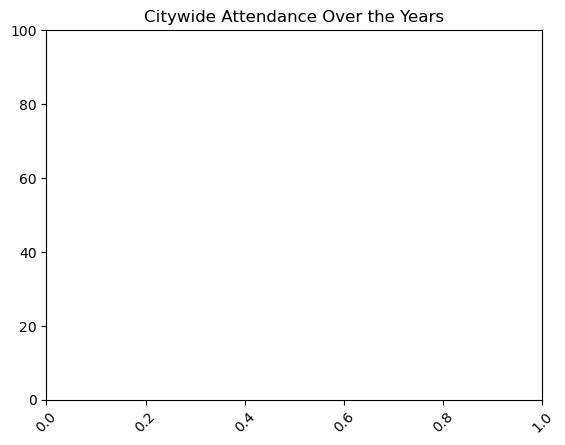

In [456]:
# choose years to plot
years_to_plot = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
subset = citywide[citywide['Year'].isin(years_to_plot)]

# plot attendance by years
sns.barplot(data=subset, x='Year', y='% Attendance')
plt.title('Citywide Attendance Over the Years')
plt.ylim(0,100)
plt.xticks(rotation=45)
plt.show()

In [457]:
absent_df['% Attendance'].head()

0    92.6
1    92.9
2    88.0
3    85.0
4    87.3
Name: % Attendance, dtype: float64

In [458]:
citywide = absent_df[absent_df['Grade'] == 'All Grades']

citywide.shape

(0, 10)

## Bivariate Analysis

In [459]:
# Days Absent, Year